### Import models and load data

In [1]:
import torch
torch.manual_seed(1234)

from importlib import reload
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import sys

mini_batch_size = 1000
nb_runs = 10

### 1channel2images

In [2]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _1channel2images
reload(_1channel2images)
from _1channel2images import *
print("Working with 1channel2images framework, nb_classes = ", nb_classes)

Working with 1channel2images framework, nb_classes =  10


phase: train, epoch: 100, loss: 0.26691, acc: 0.9660
phase: val, epoch: 100, loss: 0.26388, acc: 0.9660
Training complete in 0 min 7 s
Best val acc: 0.9660
phase: train, epoch: 100, loss: 0.30401, acc: 0.9570
phase: val, epoch: 100, loss: 0.30060, acc: 0.9585
Training complete in 0 min 7 s
Best val acc: 0.9585
phase: train, epoch: 100, loss: 0.31638, acc: 0.9575
phase: val, epoch: 100, loss: 0.31346, acc: 0.9585
Training complete in 0 min 8 s
Best val acc: 0.9585
phase: train, epoch: 100, loss: 0.34718, acc: 0.9560
phase: val, epoch: 100, loss: 0.34434, acc: 0.9570
Training complete in 0 min 8 s
Best val acc: 0.9570
phase: train, epoch: 100, loss: 0.29918, acc: 0.9600
phase: val, epoch: 100, loss: 0.29641, acc: 0.9605
Training complete in 0 min 8 s
Best val acc: 0.9605
phase: train, epoch: 100, loss: 0.28147, acc: 0.9645
phase: val, epoch: 100, loss: 0.27885, acc: 0.9645
Training complete in 0 min 8 s
Best val acc: 0.9650
phase: train, epoch: 100, loss: 0.30510, acc: 0.9640
phase: val,

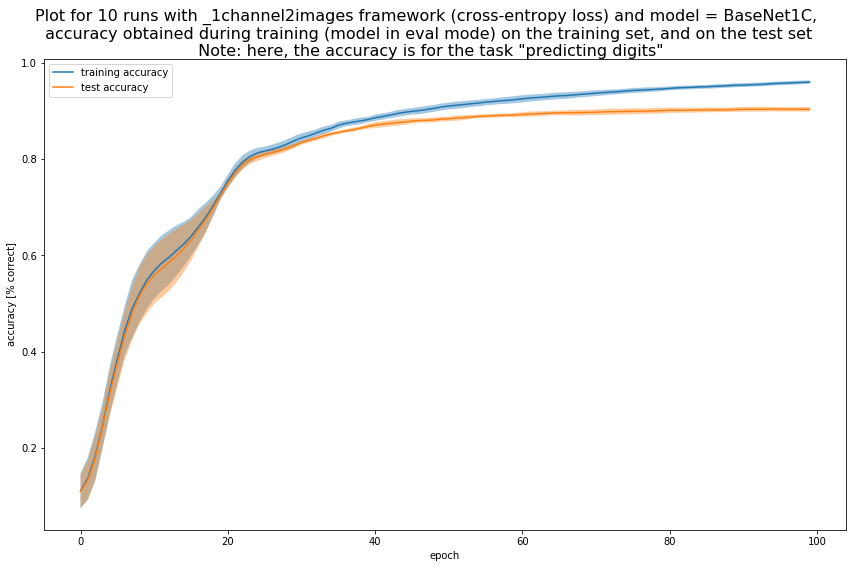

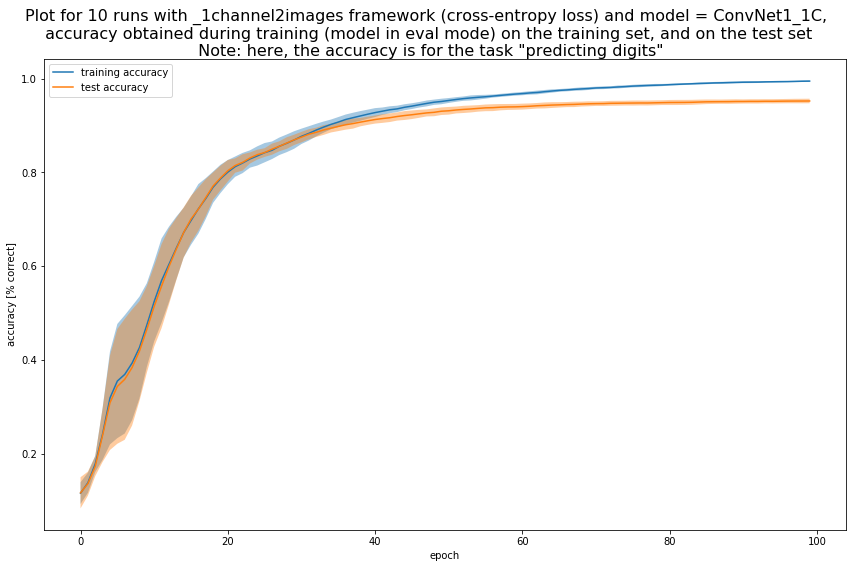

In [3]:
model1C_list = [BaseNet1C(), ConvNet1_1C()]
lr = 0.01
nb_epochs = 100 # way sufficient for this framework
for model_1C in model1C_list:
    test_results_1C = multiple_training_runs_1C(model_1C, nb_runs, lr, mini_batch_size, nb_epochs, verbose=True)
    write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)

In [7]:
import pandas as pd
print(test_results_1C)
write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)
data = pd.read_csv('1channel2images.csv')
data.head()

(76.78916523456573, 1.5373751295400617, 0.9948999999999998, 0.0016124515496597196, 0.9525000000000002, 0.004696334267868466, 0.9681000000000001, 0.003956710193526383)
Overwriting file


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean digits accuracy (test set),Std digits accuracy,Mean accuracy (test set),Std accuracy
0,ConvNet1_1C,72226,0.01,100,76.79,0.9949,0.0016,0.9525,0.0047


### 2channels1image

In [3]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _2channels1image
reload(_2channels1image)
from _2channels1image import *
import test
reload(test)
from test import *
print("Working with 2channels1image framework, nb_classes = ", nb_classes)

Working with 2channels1image framework, nb_classes =  1


In [ ]:
model2C_list = [BaseNet2C(), ConvNet1_2C(), ConvNet2_2C()]
nb_epochs_list = [100, 200, 150]
for (nb_epochs, model_2C) in zip(nb_epochs_list, model2C_list):
    test_results_2C = multiple_training_runs_fn(model_2C, train_model_2C, test_model_2C, title_2C, nb_runs, lr, 
                                                mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)

In [ ]:
print(test_results_2C)
write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)
data = pd.read_csv('2channels1image.csv')
data.head()

### Weight Sharing

In [8]:
sys.path.insert(0, "weightssharingModels")
import NetSharing
reload(NetSharing)
from NetSharing import *
import weight_sharing
reload(weight_sharing)
from weight_sharing import *
print("Working with weight_sharing framework")

Working with weight_sharing framework


In [9]:
#modelws_list = [NetSharing1(), NetSharing2(), NetSharing2b(), NetSharing2c(), NetSharing2d(), NetSharing3()] # Stronger reg on Net3
#nb_epochs_list = [150, 150, 150, 150, 150, 200]
mini_batch_size = 100
lr = 0.01
nb_runs = 2
modelws_list = [NetSharing2d4(), NetSharing2(), NetSharing2b(), NetSharing2c(), NetSharing2d(), NetSharing2d1(), NetSharing2d2(),
               NetSharing2d3(), NetSharing2d4(), NetSharing3()]
#modelws_list = [NetSharing3()]
nb_epochs_list = [300, 200, 200]
nb_epochs = 75
#for (nb_epochs, model_ws) in zip(nb_epochs_list, modelws_list):
for model_ws in modelws_list:
    test_results_ws = multiple_training_runs_fn(model_ws, train_model_ws, test_model_ws, title_ws, nb_runs, lr, 
                                                 mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)
    print("For model {}, test_acc = {}".format(model_ws.name, test_results_ws[4]))

KeyboardInterrupt: 

In [98]:
import pandas as pd
print(test_results_ws)
write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)
data = pd.read_csv('weightsharing.csv')
data.head()

(62.53688049316406, 0.28004996113985076, 0.9724999999999999, 0.010606601717798222, 0.827, 0.005656854249492385)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,NetSharing1,44517,0.01,150,82.68,0.9512,0.0097,0.8485,0.0099
1,NetSharing2,125997,0.01,150,211.46,0.9746,0.0109,0.8558,0.0132
2,NetSharing2c,34551,0.01,150,142.10,0.5579,0.0125,0.5404,0.0182
3,NetSharing2d,34651,0.01,150,137.68,0.8615,0.0143,0.8297,0.0200
4,NetSharing3,177097,0.01,200,298.81,0.9935,0.0033,0.8507,0.0122


### Auxiliary Losses

In [20]:
sys.path.insert(0, "auxiliarylossesModels")
import Incept
reload(Incept)
from Incept import *
#import auxiliary_losses
#reload(auxiliary_losses)
#from auxiliary_losses import *
import auxiliary_losses_NEW
reload(auxiliary_losses_NEW)
from auxiliary_losses_NEW import *
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import test
reload(test)
from test import *
print("Working with auxiliary losses framework")

Working with auxiliary losses framework


In [21]:
modelaux_list = [Incept1(), Incept11(), Incept2(), Incept3(), Incept4(), Incept5(), Incept6()] # Stronger reg and longer training on Incept3
#nb_epochs_list = [100, 100, 300, 100]
#modelaux_list = [Incept11()]
lr = 0.01
#alpha_list = [0.1]
nb_epochs = 150
for model_aux in modelaux_list:
    #for alpha in alpha_list:
#for nb_epochs, model_aux in zip(nb_epochs_list, modelaux_list):
        test_results_aux = multiple_training_runs_fn(model_aux, train_model_aux, test_model_aux, title_aux, nb_runs, lr,
                                                     mini_batch_size, nb_epochs, verbose=True)
        #test_results_aux = multiple_training_runs_aux(model_aux, title_aux, nb_runs, lr, alpha,
        #                                             mini_batch_size, nb_epochs, verbose=True)
        write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
        #print("For alpha = {} and model {}, test_acc = {}".format(alpha, model_aux.name, test_results_aux[4]))
        print("model {}, test_acc = {}".format(model_aux.name, test_results_aux[4]))
        
        


IndexError: list index out of range

In [ ]:
import pandas as pd
print(test_results_aux)
write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
data = pd.read_csv('auxiliary_losses.csv')
data.head()